In [1]:
import os
if not os.path.exists('../input'):
    !kaggle datasets download -d kmader/qbi-image-segmentation -wp fossil
    !mkdir ../input
    !mv fossil/kmader/qbi-image-segmentation/* ../input

Here we look at Fossil Data from the documentary shown [here](https://vimeo.com/208535479) password is qbi2017 

An interactive video example [Video Instructions](http://people.ee.ethz.ch/~maderk/videos/DoesMyFossilHaveTeeth.swf)

The steps are to

- Load the data
- Display each slice in every direction
- Show a 3D isosurface plot

In [2]:
import numpy as np # linear algebra
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.util import montage as montage2d

In [3]:
fossil_path = '../input/Gut-PhilElvCropped.tif'
fossil_data = imread(fossil_path)

print('Loading Fossil Data sized {}'.format(fossil_data.shape))

Loading Fossil Data sized (250, 296, 349)


Text(0.5,1,'Slice Histogram')

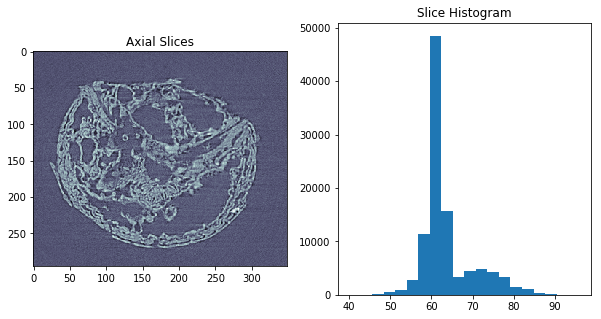

In [4]:
%matplotlib inline
slice_idx = int(fossil_data.shape[0]/2)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))

ax1.imshow(fossil_data[slice_idx], cmap = 'bone')
ax1.set_title('Axial Slices')
_ = ax2.hist(fossil_data[slice_idx].ravel(), 20)
ax2.set_title('Slice Histogram')

# Filtering
Here we use a simple filter to clean up the data, a better one would preserve features

Text(0.5,1,'Filtered Slice')

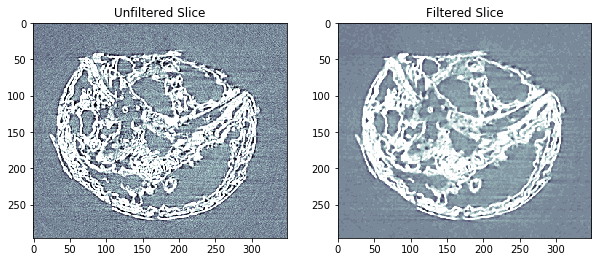

In [5]:
%matplotlib inline
from scipy.ndimage.filters import median_filter
# filter the data
filter_fossil_data = median_filter(fossil_data, (3,3,3))

# setup the plot
slice_idx = int(fossil_data.shape[0]/2)
test_slice = fossil_data[slice_idx]
test_filt_slice = filter_fossil_data[slice_idx]
# setup the default image arguments
im_args = dict(cmap = 'bone', vmin = 50, vmax = 70)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))
ax1.imshow(test_slice, **im_args)
ax1.set_title('Unfiltered Slice')
_ = ax2.imshow(test_filt_slice, **im_args)
ax2.set_title('Filtered Slice')

# Showing Various Slices
Here we show the axial, saggital and coronal slices through the 3D Volume

(-0.5, 2367.5, 1999.5, -0.5)

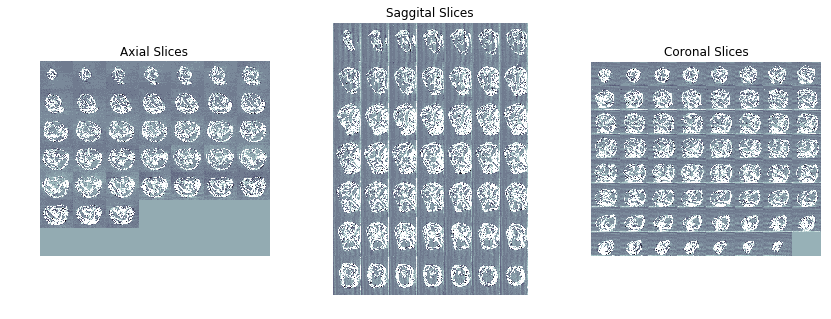

In [6]:
%matplotlib inline
skip_border = 50
skip_middle = 4
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (14, 5))
ax1.imshow(montage2d(filter_fossil_data[skip_border:-skip_border:skip_middle]),**im_args)
ax1.set_title('Axial Slices')
ax1.axis('off')

ax2.imshow(montage2d(filter_fossil_data.transpose(1,2,0)[skip_border:-skip_border:skip_middle]), **im_args)
ax2.set_title('Saggital Slices')
ax2.axis('off')

ax3.imshow(montage2d(filter_fossil_data.transpose(2,0,1)[skip_border:-skip_border:skip_middle]), **im_args)
ax3.set_title('Coronal Slices')
ax3.axis('off')

# Apply Threshold
Here we apply a threshold to the data

Text(0.5,1,'Slice with Threshold')

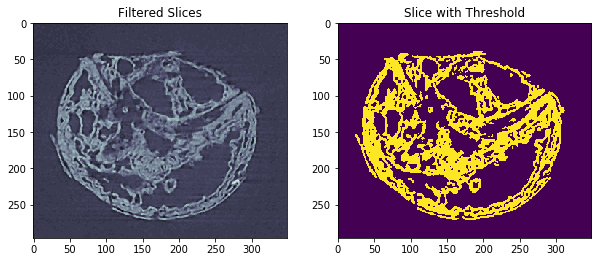

In [7]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))
thresh_fossil_data = filter_fossil_data > 65
thresh_slice = thresh_fossil_data[slice_idx]
ax1.imshow(test_filt_slice, cmap = 'bone')
ax1.set_title('Filtered Slices')
_ = ax2.imshow(thresh_slice)
ax2.set_title('Slice with Threshold')

# Morphology
Here we apply a closing operation to connect the nearby components

Text(0.5,1,'Slice After Closing')

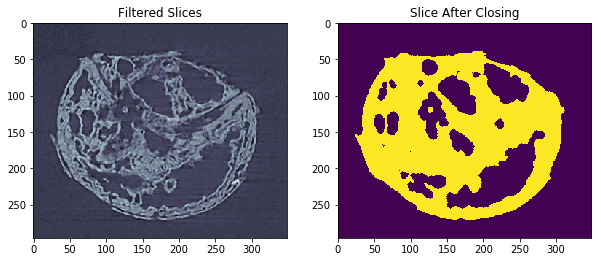

In [8]:
%matplotlib inline
from skimage.morphology import binary_closing, ball
closed_fossil_data = binary_closing(thresh_fossil_data, ball(5))
close_slice = closed_fossil_data[slice_idx]
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))

ax1.imshow(test_filt_slice, cmap = 'bone')
ax1.set_title('Filtered Slices')
_ = ax2.imshow(close_slice)
ax2.set_title('Slice After Closing')

In [9]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
def show_3d_mesh(p, threshold):
    verts, faces, _, _ = measure.marching_cubes_lewiner(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.9, edgecolor='none', linewidth = 0.1)
    mesh.set_facecolor([.1, 1, .1])
    mesh.set_edgecolor([1, 0, 0])
    
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    
    ax.view_init(45, 45)
    return fig

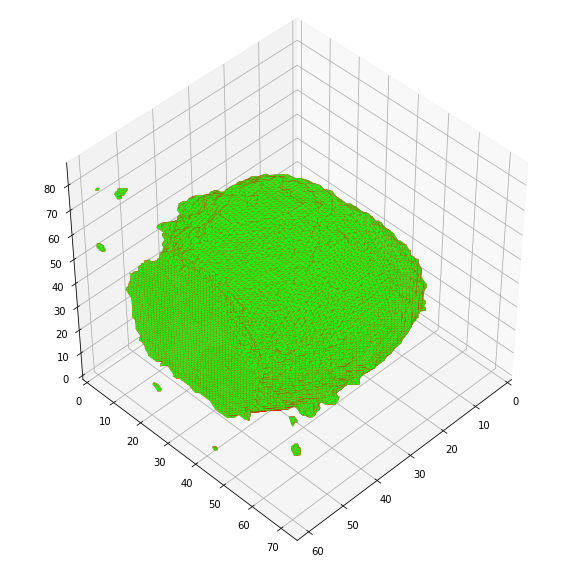

In [10]:
from scipy.ndimage import zoom
# we downsample the image to make 3d rendering quicker
fossil_downscale = zoom(closed_fossil_data.astype(np.float32), 0.25)
# now we display it with a nice mesh
_ = show_3d_mesh(fossil_downscale, 0.5)

# Tasks

 1. Adjust the threshold and angles to try and see the gut structure better
 2. Improve the filters by using more advanced techniques and windows (bonus for non-local means)
 3. Apply the same analysis to the teeth fossil data (teeth_fossil.tif)
 4. Show the inside of the fossil and try to visualize different structures there

# Fun Bonus
You can use ipyvolume to interactively view the volume in the browser (a lower resolution version)

In [11]:
import ipyvolume as p3
p3.volshow(fossil_downscale)

/Users/mader/anaconda/envs/qbi2018/lib/python3.6/site-packages/ipyvolume/serialize.py:66: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


Figure(camera_center=[0.0, 0.0, 0.0], data_max=1.3863095045089722, data_min=-0.3340931534767151, height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], style={'axes': {'visible': True, 'label': {'color': 'black'}, 'ticklabel': {'color': 'black'}, 'color': 'black'}, 'box': {'visible': True}, 'background-color': 'white'}, tf=TransferFunctionWidgetJs3(level3=0.9), volume_data=array([[[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
        ...,
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
        [ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00, ...,
         -0.00000000e+00, -0.00000000e+00,  0.00000000e+00]],

       [[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         -0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
        ...,
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00, -0.00000000e+00]],

       [[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         -0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
        ...,
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         -0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         -0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]],

       ...,

       [[-3.76158192e-37,  1.51815095e-35,  6.49399503e-33, ...,
         -2.22262138e-21,  1.98495090e-20,  5.04870979e-29],
        [-4.81364937e-35, -9.90722685e-20, -4.06872839e-17, ...,
         -3.29390759e-09, -9.44735089e-12,  1.61637599e-27],
        [-6.12686464e-33, -4.05064126e-17, -1.66352917e-14, ...,
         -6.41156760e-07, -2.14454987e-09,  8.26776716e-25],
        ...,
        [-1.69406589e-21,  1.06274128e-05, -5.88280773e-06, ...,
         -5.80646437e-31, -1.41385595e-33, -0.00000000e+00],
        [ 9.52912066e-22,  1.11662421e-05,  2.57819011e-05, ...,
         -1.42016909e-33, -3.45806740e-36,  0.00000000e+00],
        [-5.29395592e-23, -1.62251477e-21, -2.12391547e-21, ...,
          0.00000000e+00, -0.00000000e+00,  0.00000000e+00]],

       [[ 3.76158192e-37,  1.24309115e-33, -1.59960519e-31, ...,
          2.39511439e-20, -2.12680246e-19, -4.03896783e-28],
        [ 1.15556972e-33,  1.06151240e-18,  4.35944962e-16, ...,
          3.59785837e-08,  1.02894096e-10,  1.00167980e-25],
        [ 5.85506777e-31,  4.34007003e-16,  1.78239259e-13, ...,
          5.13295390e-06,  1.87489348e-08,  1.98507191e-23